In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab
import statsmodels.api as sm
import statsmodels.stats as smt

In [2]:
url_lol = 'https://raw.githubusercontent.com/michellyrds/mqaa/master/datasets/high_diamond_ranked_10min.csv'

url = url_lol
raw_data = pd.read_csv(url)

df_raw = raw_data.filter(['blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueGoldDiff'], axis=1)

raw_data.head(10)


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [16]:
# df = df_raw.rename(columns={'blueWardsPlaced' : 'azulSentinelas', 
#                             'blueKills' : 'azulAbates',
#                             'blueDeaths' : 'azulMortes', 
#                             'blueEliteMonsters' : 'azulMonstrosEpicos', 
#                             'blueGoldDiff' : 'azulDiferencaOuros',
#                             'blueWardsPlaced': 'azulSentinelasDestruidas'
#                             'blueFirstBlood': 'azulPrimeiroAbate',
#                             'blueAssists': 'azulAssistencias'
#                             })

df = raw_data.filter(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin'])
df.info


<bound method DataFrame.info of           gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1    

In [4]:
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
dtype: int64

## Objetivo
Dado a composição e o desempenho do time azul nos primeiros 10 minutos da partida, deseja-se prever a probabilidade da equipe vencer o jogo (variável binária: vitória ou derrota).

## Pré-requisitos do modelo logístico
1. Resposta binária;
2. Relação linear entre o vetor das variáveis explicativas X e o logit da variável resposta Y;
3. Sem outliers fortemente influentes;
4. Ausência de multicolinearidade perfeita entre as variáveis independentes;
4. Independência das observações.


### 1ª suposição: resposta binária
Como queremos prever uma resposta vitória ou derrota, que é uma resposta binária, a primeira suposição está satisfeita.

### 2ª suposição: linearidade das variáveis independentes e o logit da variável de resposta Y

Para checar a 2ª suposição devemos selecionar as variáveis independentes do dataset, que são as variáveis de composição do time e aplicar o teste de Box-Tidwell.

In [5]:
independent_vars = df.filter(['blueWardsPlaced', 'blueTotalMinionsKilled', 'blueTotalExperience'])

independent_vars_columns = ['blueWardsPlaced', 'blueTotalMinionsKilled', 'blueTotalExperience']

for var in independent_vars_columns:
  df[f'{var}:Log_{var}'] = df[var].apply(lambda x: x * np.log(x))

cols_to_keep = independent_vars_columns + df.columns.tolist()[-len(independent_vars_columns):]

X, y = df.loc[:, df.columns!='blueWins'], df.filter(['blueWins'], axis=1) 

X_lt = df[cols_to_keep]

X_lt = sm.add_constant(X_lt, prepend=False)

logit_results = sm.GLM(y, X_lt, family=sm.families.Binomial()).fit()

print(logit_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               blueWins   No. Observations:                 9879
Model:                            GLM   Df Residuals:                     9872
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5989.4
Date:                Sat, 27 Nov 2021   Deviance:                       11979.
Time:                        20:37:25   Pearson chi2:                 9.87e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1595
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Verificando a significância estatística de blueWardsPlaced:Log_blueWardsPlaced e blueTotalMinionsKilled:Log_blueTotalMinionsKilled baseado no p-value:

Vemos que as variáveis **blueWardsPlaced:Log_blueWardsPlaced**, **blueTotalMinionsKilled:Log_blueTotalMinionsKilled** e **blueTotalExperience** tem seu **p-value > 0.05**, logo, são linearmente relatadas ao seu logit.

Ainda sim, podemos verificar visualmente o teste da linearidade relatada ao logit das variáveis para confirmar o teste:

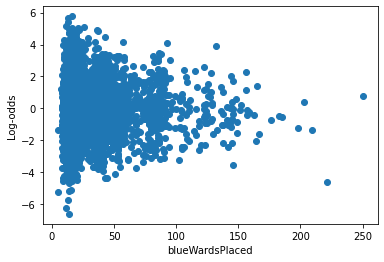

In [6]:
X, y = df.loc[:, df.columns!='blueWins'], df.filter(['blueWins'], axis=1) 

logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
predicted = logit_results.predict(X)

log_odds = np.log(predicted / (1 - predicted))

plt.scatter(x = df['blueWardsPlaced'].values, y = log_odds)
plt.xlabel("blueWardsPlaced")
plt.ylabel("Log-odds")
plt.show()

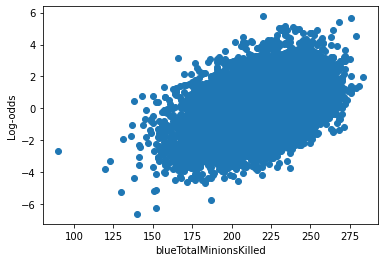

In [7]:
X, y = df.loc[:, df.columns!='blueWins'], df.filter(['blueWins'], axis=1) 

logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
predicted = logit_results.predict(X)

log_odds = np.log(predicted / (1 - predicted))

plt.scatter(x = df['blueTotalMinionsKilled'].values, y = log_odds)
plt.xlabel("blueTotalMinionsKilled")
plt.ylabel("Log-odds")
plt.show()

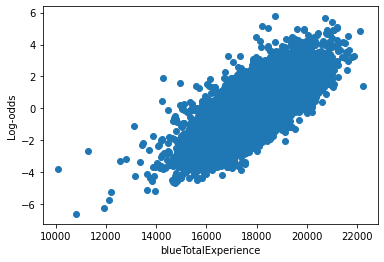

In [8]:
X, y = df.loc[:, df.columns!='blueWins'], df.filter(['blueWins'], axis=1) 

logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
predicted = logit_results.predict(X)

log_odds = np.log(predicted / (1 - predicted))

plt.scatter(x = df['blueTotalExperience'].values, y = log_odds)
plt.xlabel("blueTotalExperience")
plt.ylabel("Log-odds")
plt.show()

### 3ª suposição: sem outliers fortemente influentes

Utilizaremos a distância de Cook para medir a influência de uma observação.

In [9]:
# Use GLM method for logreg here so that we can retrieve the influence measures
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(df)

# Append absolute standardized residual values 
diagnosis_df['std_resid'] = st.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

/tmp/ipykernel_23078/313311843.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = st.zscore(logit_results.resid_pearson)
/tmp/ipykernel_23078/313311843.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


,cooks_d,std_resid
1194,0.001559,4.051948
7286,0.001316,3.417986
3359,0.001197,4.771672
9608,0.001037,6.739349
8554,0.001030,5.661852


Na tabela acima, identificamos todos os outliers mais influentes do dataset, ou seja, dados com valores residuais padronizados absolutos maiores que 3 (exibindo os 5 primeiros). Com isso, basta excluí-los do dataset original.

In [10]:
df = df.drop(diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)].index)

### 4ª suposição: ausência de multicolinearidade perfeita entre as variáveis independentes

Para realizar tal teste, usaremos o variance inflation factor (VIF).

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_vars = df.filter(['blueWardsPlaced', 'blueTotalMinionsKilled', 'blueTotalExperience']) 

def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(independent_vars)

,variables,VIF
0,blueWardsPlaced,2.531855
1,blueTotalMinionsKilled,146.181893
2,blueTotalExperience,149.421702


Valores de VIF que excedem 5 ou 10 indicam ao alto grau de multicolinearidade. Logo, pelo teste, vemos que existe multicolinearidade entre as variáveis **blueTotalMinionsKilled** e **blueTotalExperience**.


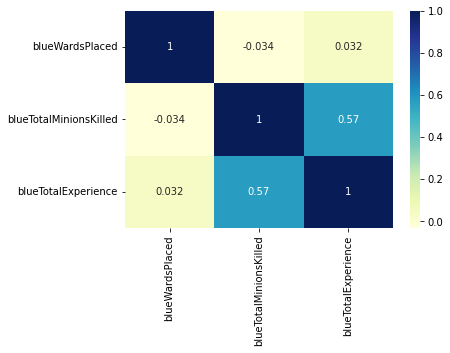

In [12]:
import seaborn as sb

# fig = plt.figure(figsize=(17,14))
# dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
dataplot = sb.heatmap(independent_vars.corr(), cmap="YlGnBu", annot=True)
  
plt.show()

Outra forma de verificar a multicolinearidade é por meio da matriz de correlação. Como não existe multicolineridade perfeita (= 1), seguiremos com a aplicação do modelo utilizando as variáveis blueTotalMinionsKilled e blueTotalExperience.

### 5ª suposição: independência das observações

As observações devem ser independentes entre si. Dado que cada linha do dataset consiste de uma partida diferente (gameId único), podemos concluir que as observações são independentes. 

Ainda assim, para testar tal condição, podemos plotar uma série residual com os resíduos de desvio do modelo logit vs o número de linhas do dataset.


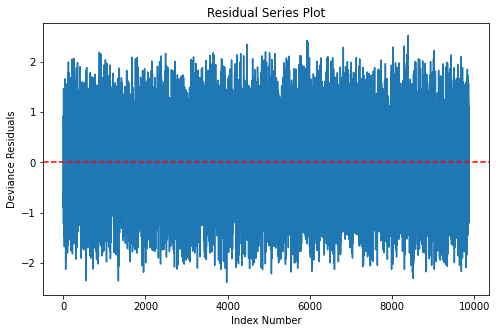

In [14]:
# Setup logistic regression model using GLM method so that we can retrieve residuals
X, y = df.loc[:, df.columns!='blueWins'], df.filter(['blueWins'], axis=1) 

logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Setup plot 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number", 
                     ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(df.index.tolist(), 
        st.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red')

Como os resíduos no gráfico parecem estar espalhados aleatoriamente em torno da linha central, podemos inferir que a suposição é satisfeita.

## Aplicando a regressão logística

Pré-processamento do dataset para aplicação do modelo logístico

In [17]:
from sklearn.model_selection import train_test_split

df = df.drop(diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)].index)

normalized_df = (df - df.min())/(df.max()-df.min())

X, y = normalized_df.loc[:, normalized_df.columns!='blueWins'], normalized_df.filter(['blueWins'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Criação do modelo



In [18]:
from sklearn.linear_model import LogisticRegression
reg =  LogisticRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

print(y_pred)

/home/michelly/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0. 1. 0. ... 0. 1. 0.]


## Avaliação da adequação do modelo

In [20]:
count_correct = 0

for x in range(y_test.size):
  if(y_test.iloc[x]['blueWins'] == y_pred.item(x)):
    count_correct = count_correct + 1
accuracy = count_correct / y_test.size * 100
print("A acurácia do modelo é de ", end = '')
print("%.3f" % accuracy, end = '')
print("%", end = '')


A acurácia do modelo é de 73.677%

In [21]:
print("Coeficientes da equação do modelo:\n{}\n".format(reg.coef_))

print("Bias adicionadas à função de decisão:\n{}".format(reg.intercept_))

Coeficientes da equação do modelo:
[[ 0.34106156 -0.6207752  -0.12996371  0.0891292   0.89300989 -2.06546098
  -0.40633373  0.16965797  0.36337469 -0.02405875 -0.3654088   1.16214352
   0.21825248 -0.33724195 -0.02259189  0.52363425  4.86302436  4.73700627
  -0.02259189  1.16214352]]

Bias adicionadas à função de decisão:
[-6.12824727]


## to do

### Likelihood Ratio Test

### Pseudo R^2

### Teste de Hosmer-Lemeshow

### Teste Wald

## Interpretação dos resultados

  O resultado apresentado pelos cálculos utilizando regressão logística foi de uma predição com uma acurácia de 73,677%. Este valor representa a quantidade de partidas que o algoritmo foi capaz de realizar uma predição correta, utilizando apenas os dados dos primeiros 10 minutos de partida.

  Antes de tirarmos conclusões sobre o quão efetivo essa acurácia obtida pelo algoritmo é, temos que ressaltar pontos importantes sobre como o jogo funciona. O primeiro ponto é de que nós estamos avaliando apenas os dados do ranque diamante, ou seja, nós não podemos supor que essa acurácia se manteria para jogadores de outros níveis, pois o peso dos fatores se alteraria, já que há diversas maneiras de se ganhar uma partida e jogadores de níveis diferentes de habilidade podem dar prioridades distintas a certas mecânicas do jogo. O segundo ponto é o de que as partidas do ranque diamante duram, em média, 26 minutos, entretanto, existem os casos mais extremos de partidas durando 15 minutos ou 40, 50 minutos. Nessa análise, nós não avaliamos se o algoritmo perde ou ganha efetividade nos extremos, pois não há a informação da duração das partidas no dataset, embora logicamente há a hipótese de que o algoritmo perderia efetividade caso as partidas se estendessem em duração, visto que o jogo tem mecânicas que permitem que o time que está atrás se recupere na partida conforme o tempo passa.

  Tendo feito as ressalvas, nós podemos concluir que o algoritmo obteve uma acurácia alta. Esta conclusão se deve ao fato de que o jogo tem muitos fatores de imprevisibilidade, como por exemplo, mecânicas que dependem de frações de segundo para serem executadas e que podem resultar na derrota dos 5 jogadores da equipe. Além disso, existe um cenário em que a aplicação de um algoritmo desse tipo é muito relevante: apostas online. Caso nós realizássemos apostas em quem ganharia as partidas, nós obteriamos muito lucro caso seguíssemos a conclusão do algoritmo.

## Referências
https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica


---
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/


---
https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290

